In [1]:
%matplotlib inline
from preamble import *

# 2.3.6 결정 트리의 앙상블

### 앙상블
    : 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
        - 분류와 회귀 문제의 다양한 데이터셋에 효과적인 2개의 앙상블 모델
     => 두개다 결정 트리를 사용(모델을 구성하는 기본요소로서)
#### 1. 랜덤 포레스트
    : 훈련 데이터에 과대적합 되는 경향이있는것을 타파
    특성:
        - 조금씩 다른 여러 결정 트리의 묶음
            : 트리는 데이터의 일부에 과대적합하는 경향을 가진다라는것을 기초
            => 그 결과를 평균냄으로서 과대적합된 양을 줄임
            
        - 결정 트리를 많이 만들어야 됨.
            -> 타킷예측도 잘하고 다른 트리와 구별되어야함.
        - 트리를 랜덤하게 만드는 방법(2가지)
            1)) 데이터 포인트를 무작위로 선택하는 방법
            2)) 분할 테스트에서 특성을 무작위로 선택하는 방법
            
###### - 랜덤 포레스트 구축
    : 생성할 트리의 개수를 정해야함.
        - 트리 생성전 데이터의 부트스트랩 샘플을 생성(n 번 반복추출)
     => 이 데이트 셋으로 결정 트리를 만듭니다.
     
###### 다른 특성 (랜덤 포레스트와 결정트리)
    : 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는것 x
        => 알고리즘이 각 노드에서 후보 특성을 무작위로 선택
            : 이 후보들 중에서 최선의 테스트를 찾음.
                - 몇개의 특성을 고를지는 매개변수로 조정 가능
     - max_feature 변수에 따라서 커지면 각자의 랜덤 포레스트 트리들은 매우 비슷해짐
     - 위의 변수가 작아지면 테스트할 특성을 고를 필요가 없다 각자 변수가 영향을 주니
        : 데이터에 맞추기 위해서 깊이가 깊어짐
        
        
###### 회귀 vs 랜덤포레스트 의 차이
    - 회귀 : 이 예측들을 평균하여 최종 예측 만듬
    - 분류 : 알고리즘이 가능성 있는 출력 레이블의 확률을 제공 함으로서 간접예측




#### 2. 그래디언트 부스팅
            

In [2]:
# 랜덤 포레스트 분석
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

C:\Users\dbdbd\Anaconda3\envs\machine\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


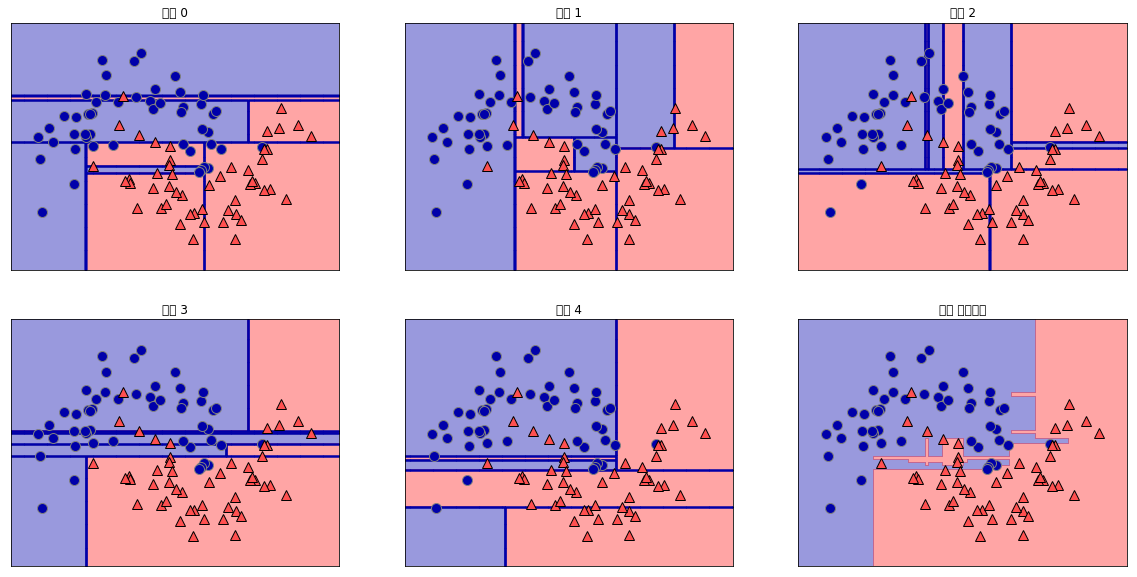

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# 개개의 트리보다 덜 과대적합 되고 훨씬 좋은 결정 경계를 만들어좀
X_train, X_test,y_train,y_test = train_test_split(
    cancer.data,cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


C:\Users\dbdbd\Anaconda3\envs\machine\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


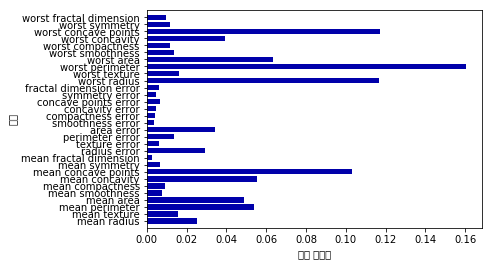

In [7]:
# 트성 중요도를 제공 => 각 트리의 특성 중요도를 취합하여 계산
# ln[63] 참조
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)

### 장단점
    - 단일 트리 경우보다 훨씬 많은 특성이 0 이상의 중요도를 가짐
        => 더 넓은 시각으로 데이터를 바라볼수 있음
        
    - 회귀와 분류에 있어서 가장 널리 사용되는 머신러닝 알고리즘
    - 성능이 매우 뛰어남
    - 매개변수 튜닝을 많이 하지 않아도 잘 작동
    - 데이터의 스케일을 맞출 필요도 없다.
    - CPU 코어가 많아서 병렬처리 할수 있을때 좋다.
        : n_jobs 변수를 통해 사용할 코어수 지정 -> but, 코어수 보다 크면 도루묵
    -  randomstate 를 지정하면( 계속 바꾸면) 전혀 다른 모델이 만들어짐
    
    ※ 텍스트 데이터 같이 차원이 높고, 희소한 데이터에서 작동 x
    < - > 이런 경우에는 선형 모델
    
    
    < - > 단일 트리 : 의사 결정 과정을 간소하게 표현해야 한다면 사용
    because : 특성 몇개만(일부만) 상ㅇ하기 때문에 결정 트리보다 더 깊어질수 있다.
    